In [1]:
import modules.io as io
import modules.vessel_regression as vessel_regression
import numpy as np
import skimage.filters as filters
import skimage.feature as feature
import matplotlib.pyplot as plt

In [2]:
DATA_KEY    = "TEST"
CONFIG_FILE = "./config/rf_2.yaml"

config      = io.load_yaml(CONFIG_FILE)

In [3]:
import factories.dataset_factory as dataset_factory

data    = dataset_factory.get(config, DATA_KEY)

411it [00:00, 4104.90it/s]

centering images


6321it [00:01, 4111.18it/s]
 15%|█▍        | 937/6321 [00:10<00:57, 93.64it/s]

outlier


 26%|██▌       | 1634/6321 [00:17<00:49, 95.06it/s]

outlier


 36%|███▋      | 2301/6321 [00:24<00:42, 95.41it/s]

outlier


 41%|████      | 2578/6321 [00:26<00:39, 95.78it/s]

outlier


 51%|█████▏    | 3249/6321 [00:33<00:32, 95.94it/s]

outlier
outlier


 53%|█████▎    | 3341/6321 [00:34<00:31, 96.02it/s]

outlier
outlier
outlier
outlier
outlier


 55%|█████▍    | 3462/6321 [00:36<00:29, 95.99it/s]

outlier
outlier


 55%|█████▌    | 3482/6321 [00:36<00:29, 95.96it/s]

outlier
outlier


 56%|█████▌    | 3535/6321 [00:36<00:29, 96.02it/s]

outlier


 57%|█████▋    | 3573/6321 [00:37<00:28, 95.51it/s]

outlier
outlier


 58%|█████▊    | 3639/6321 [00:38<00:28, 95.62it/s]

outlier
outlier


 58%|█████▊    | 3672/6321 [00:38<00:27, 95.68it/s]

outlier
outlier
outlier


 58%|█████▊    | 3694/6321 [00:38<00:27, 95.71it/s]

outlier
outlier


 61%|██████▏   | 3879/6321 [00:40<00:25, 95.73it/s]

outlier
outlier


 80%|████████  | 5084/6321 [00:53<00:12, 95.62it/s]

outlier


 83%|████████▎ | 5216/6321 [00:54<00:11, 95.79it/s]

outlier


 84%|████████▍ | 5304/6321 [00:55<00:10, 95.89it/s]

outlier


 88%|████████▊ | 5539/6321 [00:57<00:08, 95.82it/s]

outlier


100%|██████████| 6321/6321 [01:05<00:00, 95.79it/s]


In [4]:
X = data[0]
C = data[1]
N = X.shape[0]
print(X.shape)
print(C.shape)

(6290, 160, 160)
(6290, 15)


369


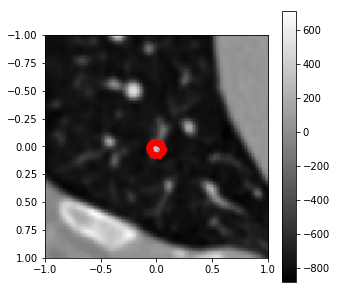

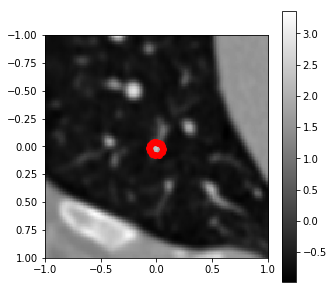

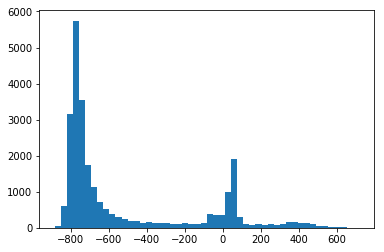

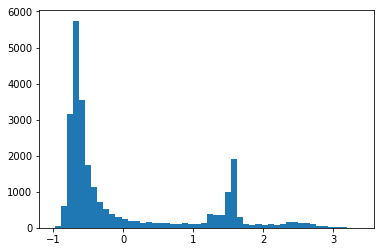

[-0.98366248 -0.68468718 -0.56237911 -0.42648125 -0.02340819  1.33475502
  1.57393526  1.87576441  2.67201715  3.36506906]


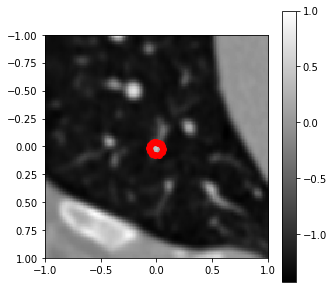

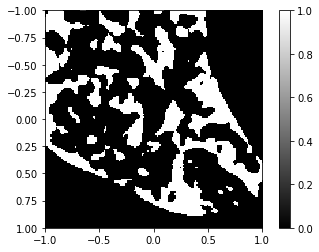

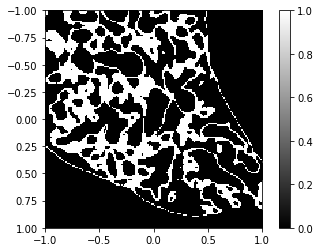

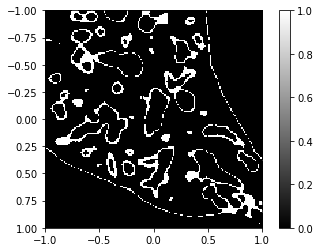

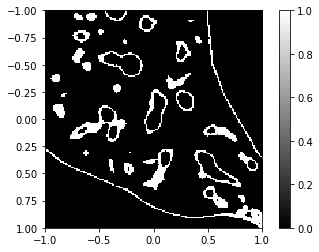

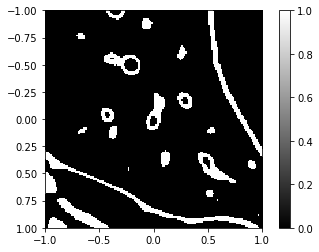

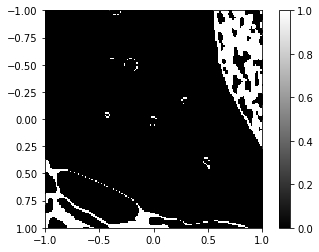

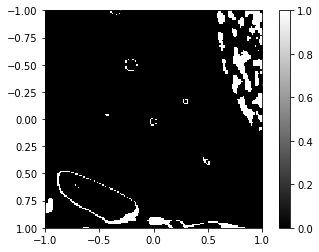

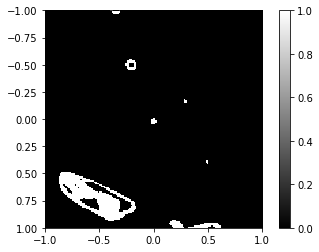

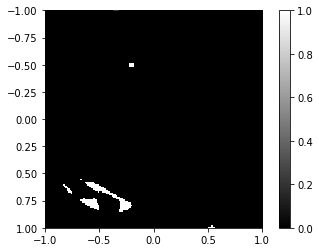

In [65]:
mid = int(X.shape[1]/2)
WIN = 60
OFF = (WIN*2.0/X.shape[1])

i = np.random.randint(N)
print(i)
x = X[i]


xnorm = (1.0*x - np.mean(x))/(np.std(x)+1e-5)

c = C[i]

c = vessel_regression.pred_to_contour(c)

plt.figure(figsize=(5,5))
plt.imshow(x,cmap='gray', extent=[-1, 1, 1, -1])
plt.colorbar()
plt.scatter(c[:,0],c[:,1],color='r')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(xnorm,cmap='gray', extent=[-1, 1, 1, -1])
plt.colorbar()
plt.scatter(c[:,0],c[:,1],color='r')
plt.show()

plt.figure()
plt.hist(np.ravel(x), bins=50)
plt.show()
plt.close()

plt.figure()
plt.hist(np.ravel(xnorm), bins=50)
plt.show()
plt.close()

quantiles = np.percentile(np.ravel(xnorm), q=[0, 25, 50, 60, 70, 80, 90, 95, 99, 100])
print(quantiles)

xnorm2 = (1.0*xnorm - quantiles[-4])/(quantiles[-1]-quantiles[-4])

plt.figure(figsize=(5,5))
plt.imshow(xnorm2,cmap='gray', extent=[-1, 1, 1, -1])
plt.colorbar()
plt.scatter(c[:,0],c[:,1],color='r')
plt.show()

for i in range(len(quantiles)-1):
    qlow = quantiles[i]
    qhigh = quantiles[i+1]
    
    xthresh = xnorm.copy()
    xthresh[xthresh < qlow] = 0
    xthresh[xthresh > qhigh] = 0
    xthresh[xthresh != 0] = 1
    
    plt.figure()
    plt.imshow(xthresh, cmap='gray',extent=[-1, 1, 1, -1])
    plt.colorbar()
    plt.show()
    plt.close()